# Importing libs

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

In [2]:
# configuring API key for Quandl
quandl.ApiConfig.api_key = "TFxd1BtCosDWG9xyXuNe"

In [29]:
# importing Bitcoin Total Transaction Fees
data = quandl.get('BCHAIN/TRFEE')

In [30]:
data.head()

Value
Date             
2009-01-02    0.0
2009-01-03    0.0
2009-01-04    0.0
2009-01-05    0.0
2009-01-06    0.0

In [31]:
data.shape

(5484, 1)

In [32]:
data.columns

Index(['Value'], dtype='object')

In [33]:
#checking datatype
type(data)

pandas.core.frame.DataFrame

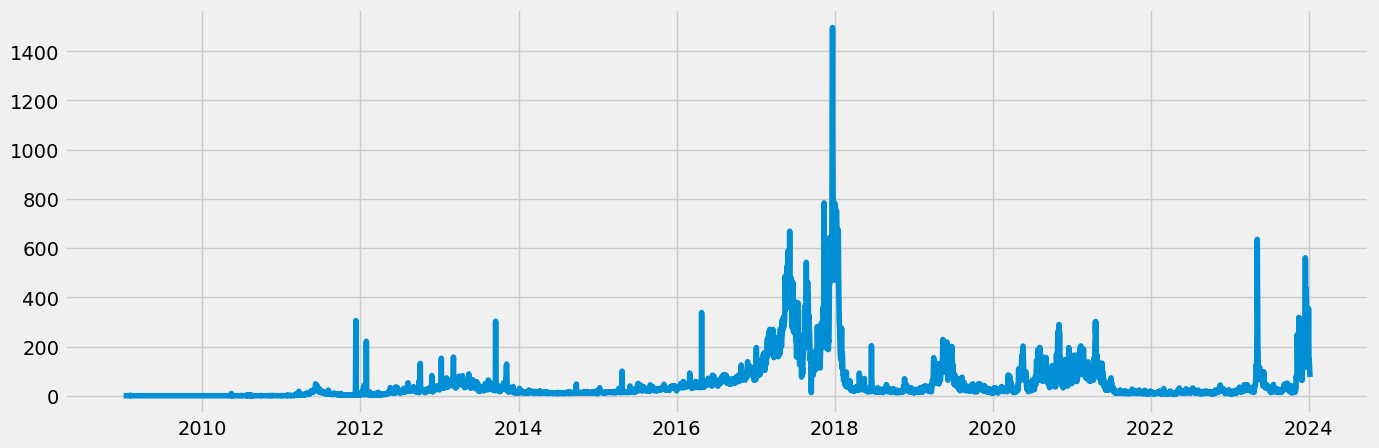

In [34]:
#plotting the data
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

In [35]:
data_usd=quandl.get("BCHAIN/TRFEE")

In [36]:
data_usd.head()

Value
Date             
2009-01-02    0.0
2009-01-03    0.0
2009-01-04    0.0
2009-01-05    0.0
2009-01-06    0.0

In [37]:
data_usd.shape

(5484, 1)

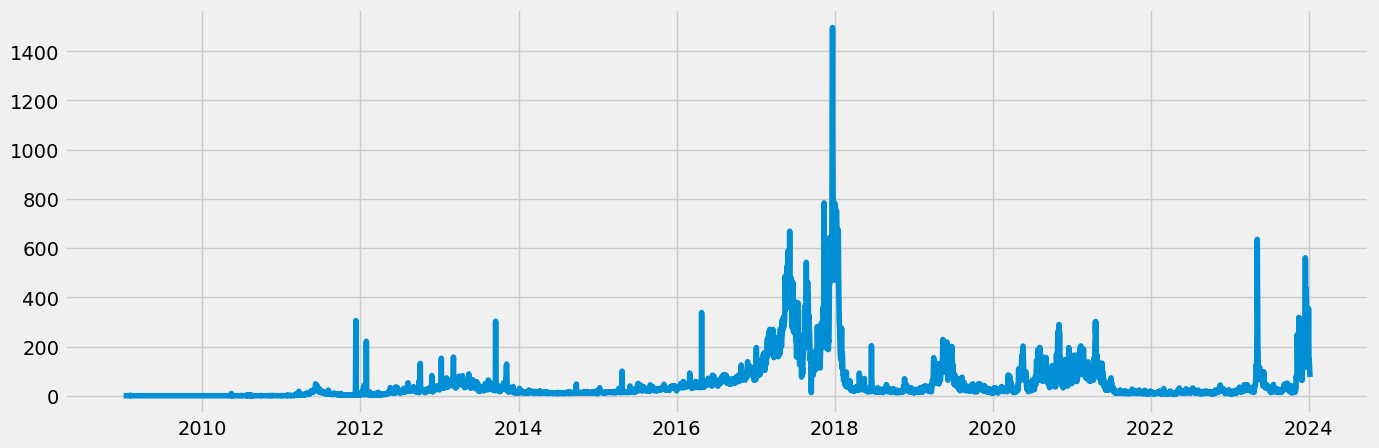

In [39]:
#plotting data_usd
plt.figure(figsize=(15,5))
plt.plot(data_usd)

## Subsetting, wrangling and cleaning time-series data

In [40]:
# resetting index
data_reset=data_usd.reset_index()

In [41]:
#checking for execution
data_reset.head(3)

Date  Value
0 2009-01-02    0.0
1 2009-01-03    0.0
2 2009-01-04    0.0

In [43]:
# creating a subset
data_subset=data_reset.loc[(data_reset["Date"]>="2016-01-01")&(data_reset["Date"]<"2024-01-01")]

In [44]:
#checking for execution
data_subset.shape

(2922, 2)

In [45]:
# settin the "Date" column as the index
from datetime import datetime

data_subset["datetime"] = pd.to_datetime(data_subset["Date"]) 
data_subset = data_subset.set_index("datetime") 
data_subset.drop(["Date"], axis=1, inplace=True)
data_subset.head()

Value
datetime             
2016-01-01  19.735688
2016-01-02  31.376005
2016-01-03  23.849122
2016-01-04  29.043092
2016-01-05  32.278467

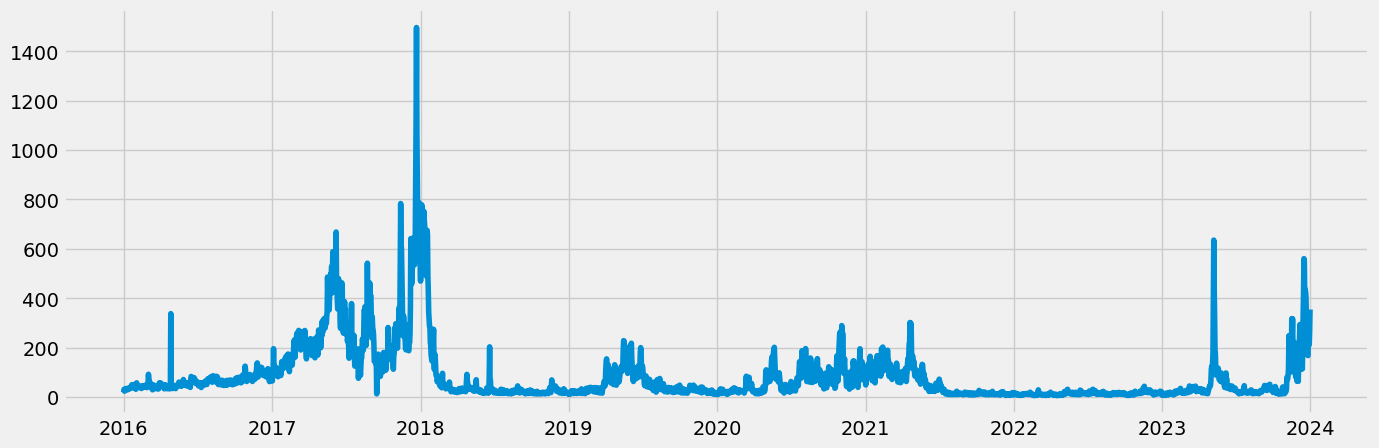

In [46]:
# plotting the new data
plt.figure(figsize=(15,5))
plt.plot(data_subset)

In [48]:
# checking for missing values
data_subset.isnull().sum()

Value    0
dtype: int64

## Decomposition

In [51]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_subset, model="additive")

In [52]:
from pylab import rcParams
rcParams["figure.figsize"] = 18, 7

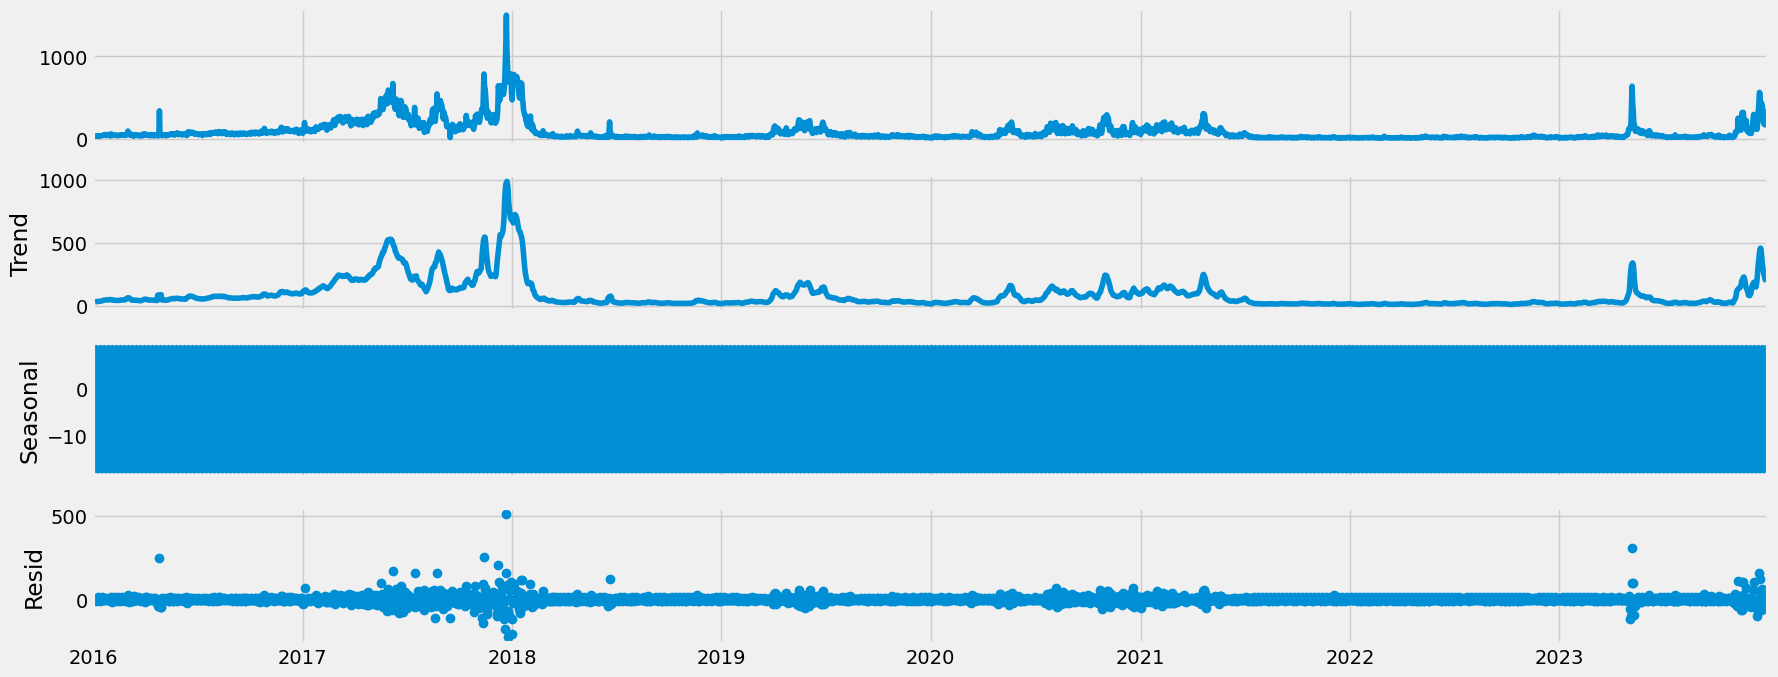

In [53]:
# Plotting the separate components
decomposition.plot()
plt.show()

## Testing for stationarity

In [54]:
from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries): # Defining the function
    # Performing the Dickey-Fuller test:
    print ("Dickey-Fuller Stationarity test:")
    test = adfuller(timeseries, autolag="AIC")
    result = pd.Series(test[0:4], index=["Test Statistic","p-value","Number of Lags Used","Number of Observations Used"])
    for key,value in test[4].items():
       result["Critical Value (%s)"%key] = value
    print (result)
# Applying the test using the function on the time series
dickey_fuller(data_subset["Value"])

Dickey-Fuller Stationarity test:
Test Statistic                   -3.816920
p-value                           0.002739
Number of Lags Used              24.000000
Number of Observations Used    2897.000000
Critical Value (1%)              -3.432609
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


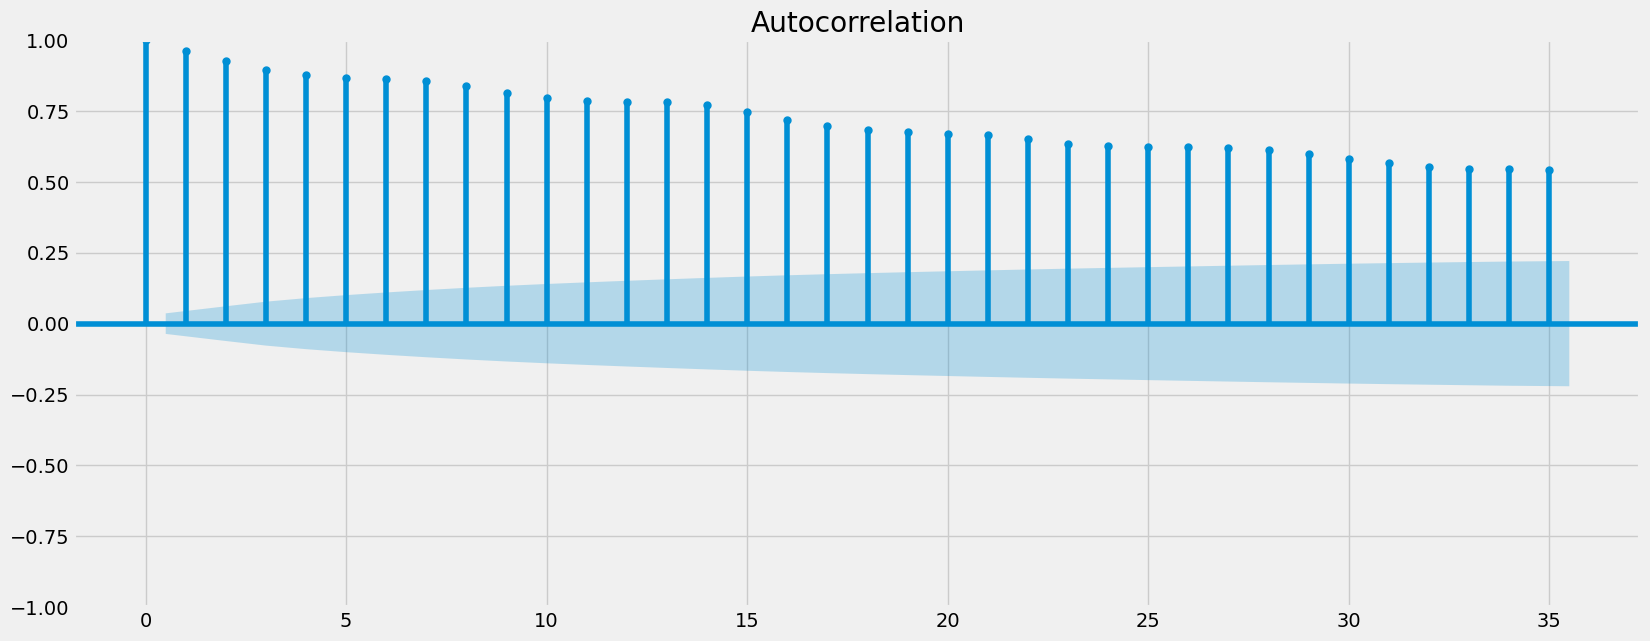

In [56]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_subset)
plt.show()

## Statioraizing the dataset

In [57]:
data_diff=data_subset-data_subset.shift(1)

In [58]:
# dropping the missing values that came as a result of the differencing to be able to perform a Dickey-Fuller test
data_diff.dropna(inplace = True)

In [59]:
data_diff.head()

Value
datetime             
2016-01-02  11.640317
2016-01-03  -7.526883
2016-01-04   5.193970
2016-01-05   3.235375
2016-01-06  -2.088645

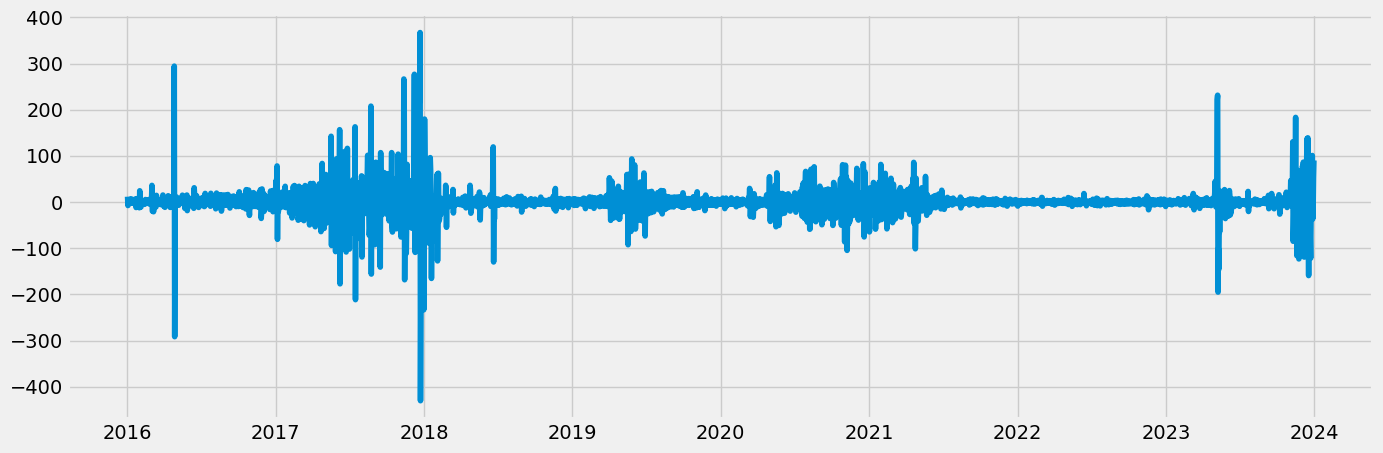

In [60]:
# Checking what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [61]:
# performing a Dickey_fuller test on the differentiated data
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.378619e+01
p-value                        9.103030e-26
Number of Lags Used            2.300000e+01
Number of Observations Used    2.897000e+03
Critical Value (1%)           -3.432609e+00
Critical Value (5%)           -2.862538e+00
Critical Value (10%)          -2.567301e+00
dtype: float64


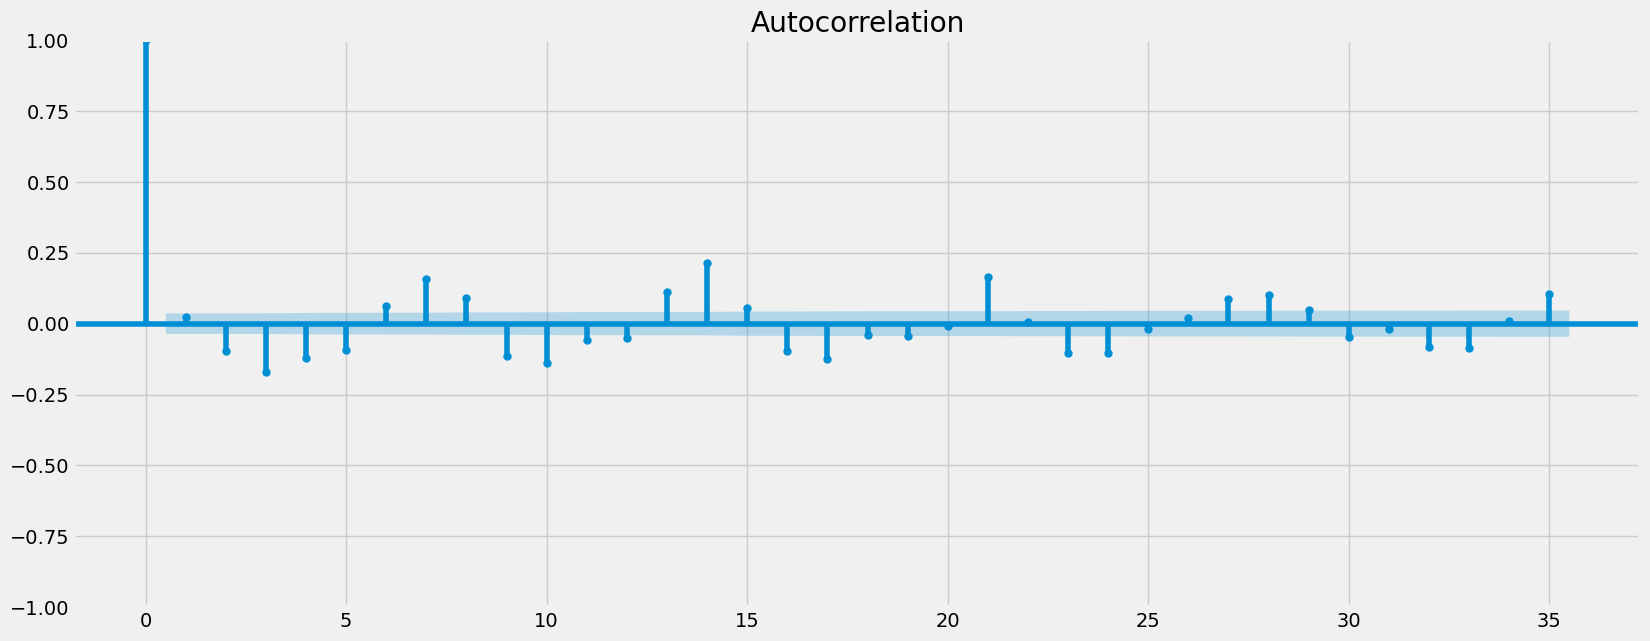

In [62]:
plot_acf(data_diff)
plt.show()

# Preparing time series analysis for my dataset

## Importing data

In [64]:
path=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\datasets\SPI Scores Clean and Formated 6.2.csv"

In [65]:
my_data=pd.read_csv(os.path.join(path))

In [66]:
# checking for execution
my_data.head(1)

Unnamed: 0  Country  Date  Data Use  Data Services  Data Products  \
0           0  Finland  2022     100.0      96.433333        88.4875   

   Data Sources  Data Infrastructure  SPI Score       Income  \
0     83.258333                100.0  93.635833  High income   

                  Region  Population Score Category  
0  Europe & Central Asia   5556106.0     High Score

In [67]:
my_data.shape

(1524, 13)

## Creating a subset to use for analysis

In [73]:
my_data_to_use=my_data[["Country","Date","SPI Score"]]

In [74]:
# checking for execution
my_data_to_use.head()

Country  Date  SPI Score
0        Finland  2022  93.635833
1         Norway  2022  93.495833
2         Canada  2022  92.922500
3    Netherlands  2022  92.825417
4  United States  2022  92.790000

In [128]:
final_df = my_data_to_use[(my_data_to_use["Date"] == 2019) | (my_data_to_use["Date"] == 2021)]

In [129]:
final_df.head(3)

Country  Date  SPI Score
217  Finland  2021  93.474167
218   Canada  2021  93.420833
219   Norway  2021  92.929167

In [131]:
final_df

Country  Date  SPI Score
217                   Finland  2021  93.474167
218                    Canada  2021  93.420833
219                    Norway  2021  92.929167
220               Netherlands  2021  92.865417
221             United States  2021  92.750000
..                        ...   ...        ...
865             Taiwan, China  2019  64.070000
866                     Tonga  2019  64.070000
867  Turks and Caicos Islands  2019  64.070000
868                    Tuvalu  2019  64.070000
869     Virgin Islands (U.S.)  2019  64.070000

[435 rows x 3 columns]

In [2]:
df['datetime']=pd.to_datetime((df['Date']), format="%Y")

NameError: name 'pd' is not defined

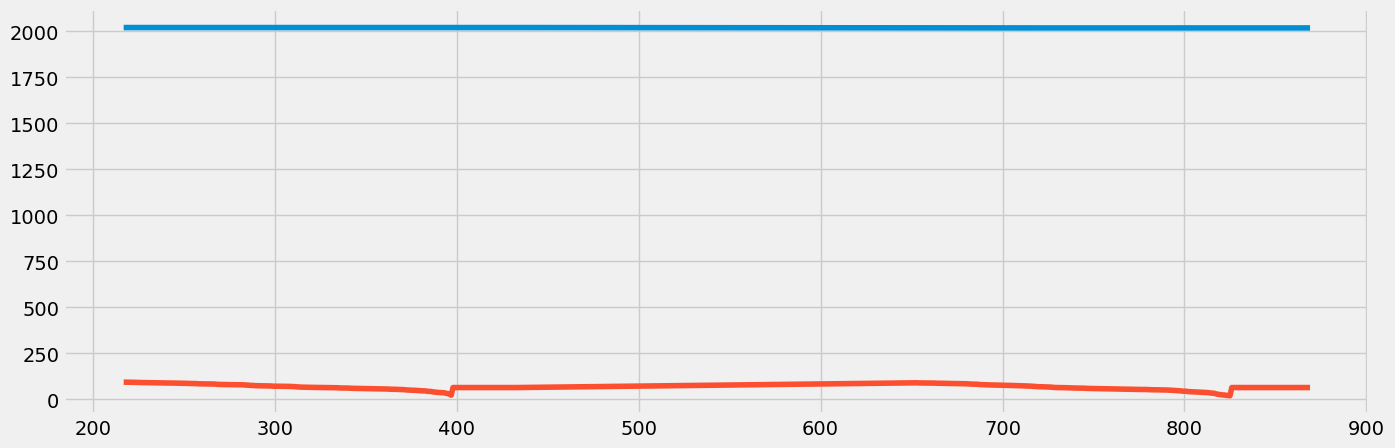

In [136]:
# plotting the new data
data_to_plot=final_df[["Date","SPI Score"]]
plt.figure(figsize=(15,5),dpi=100)
plt.plot(data_to_plot)

In [137]:
# Creating a new subset
df_2019=final_df[(final_df["Date"]==2019)]

In [138]:
# checking for execution
df_2019

Country  Date  SPI Score
652                    Norway  2019  90.093750
653                     Italy  2019  89.865833
654                   Austria  2019  89.120000
655                    Poland  2019  89.070833
656                  Slovenia  2019  88.931250
..                        ...   ...        ...
865             Taiwan, China  2019  64.070000
866                     Tonga  2019  64.070000
867  Turks and Caicos Islands  2019  64.070000
868                    Tuvalu  2019  64.070000
869     Virgin Islands (U.S.)  2019  64.070000

[218 rows x 3 columns]

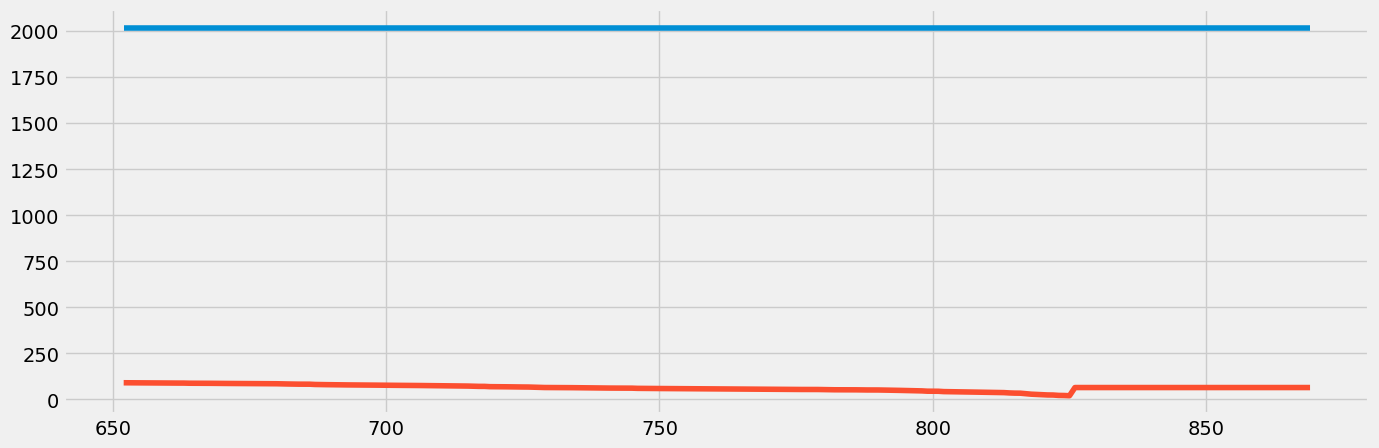

In [140]:
# Plotting 2019 data
df_2019_to_plot=df_2019[["Date","SPI Score"]]
plt.figure(figsize=(15,5),dpi=100)
plt.plot(df_2019_to_plot)

In [142]:
final_df

Country  Date  SPI Score
217                   Finland  2021  93.474167
218                    Canada  2021  93.420833
219                    Norway  2021  92.929167
220               Netherlands  2021  92.865417
221             United States  2021  92.750000
..                        ...   ...        ...
865             Taiwan, China  2019  64.070000
866                     Tonga  2019  64.070000
867  Turks and Caicos Islands  2019  64.070000
868                    Tuvalu  2019  64.070000
869     Virgin Islands (U.S.)  2019  64.070000

[435 rows x 3 columns]

In [159]:
final_df

datetime                   Country  SPI Score
0   1970-01-01 00:00:00.000002021                   Finland  93.474167
1   1970-01-01 00:00:00.000002021                    Canada  93.420833
2   1970-01-01 00:00:00.000002021                    Norway  92.929167
3   1970-01-01 00:00:00.000002021               Netherlands  92.865417
4   1970-01-01 00:00:00.000002021             United States  92.750000
..                            ...                       ...        ...
430 1970-01-01 00:00:00.000002019             Taiwan, China  64.070000
431 1970-01-01 00:00:00.000002019                     Tonga  64.070000
432 1970-01-01 00:00:00.000002019  Turks and Caicos Islands  64.070000
433 1970-01-01 00:00:00.000002019                    Tuvalu  64.070000
434 1970-01-01 00:00:00.000002019     Virgin Islands (U.S.)  64.070000

[435 rows x 3 columns]

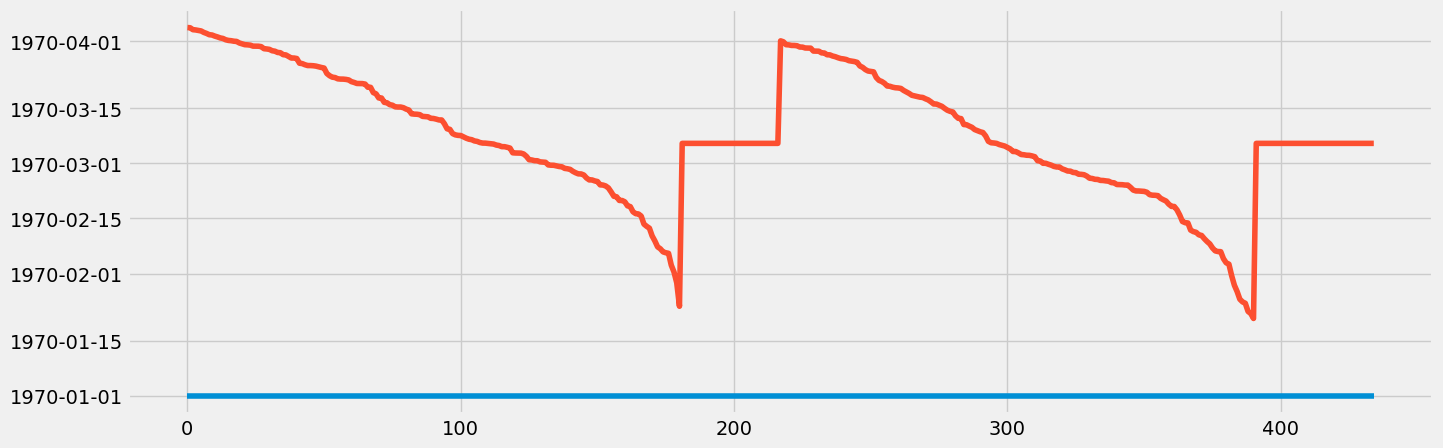

In [158]:
# plotting the data
data_to_plot=final_df[["datetime","SPI Score"]]
plt.figure(figsize=(15,5))
plt.plot(data_to_plot)

In [178]:
data_to_plot["datetime"]=data_to_plot["datetime"].astype(str)

In [179]:
data_to_plot["datetime"] = data_to_plot["datetime"].str[-4:]

In [180]:
data_to_plot

datetime  SPI Score
0       2021  93.474167
1       2021  93.420833
2       2021  92.929167
3       2021  92.865417
4       2021  92.750000
..       ...        ...
430     2019  64.070000
431     2019  64.070000
432     2019  64.070000
433     2019  64.070000
434     2019  64.070000

[435 rows x 2 columns]

In [181]:
data_to_plot["datetime"]=data_to_plot["datetime"].astype(int)

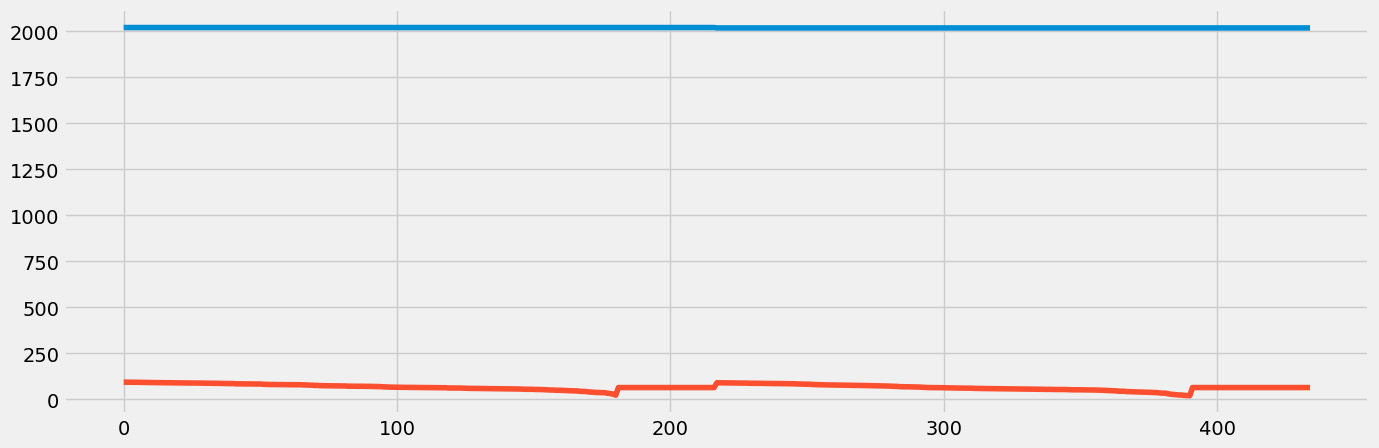

In [184]:
plt.figure(figsize=(15,5))
plt.plot(data_to_plot)

In [185]:
# checking for missing values
data_to_plot["datetime"].isnull().sum()

0

## Decomposing

In [187]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_to_plot, model="additive")
rcParams["figure.figsize"] = 18, 7
# Plotting the separate components
decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [192]:
# Convert the 'datetime' column to DatetimeIndex
data_to_plot.index = pd.to_datetime(data_to_plot['datetime'])

# Ensure that the frequency is set, if not already
data_to_plot = data_to_plot.asfreq('Y')  # Assuming 'D' for daily frequency, adjust as per your data

# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model="additive")

# Setting figure size
rcParams["figure.figsize"] = 18, 7

# Plotting the separate components
decomposition.plot()
plt.show()

ValueError: cannot reindex on an axis with duplicate labels